In [3]:
from scipy import stats
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
df_sheet_all = pd.read_excel('Weatherdata.xlsx', sheet_name=None)
df=df_sheet_all['Apr2022']

In [5]:
df=pd.concat([df,df_sheet_all['March2022']])

In [6]:
df=pd.concat([df,df_sheet_all['Feb2022']])

In [7]:
df=pd.concat([df,df_sheet_all['Jan2022']])

In [8]:
df=pd.concat([df,df_sheet_all['Dec2021']])

In [9]:
for key in list(df_sheet_all):
    df=pd.concat([df,df_sheet_all[key]])

In [10]:
df=df.reset_index()

In [11]:
df.drop('index',axis=1,inplace=True)

In [12]:
df.drop('Precipitation',axis=1,inplace=True)

In [13]:
df.head()

,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
0,2022-04-01,87.9,31.3,13.4,5.7,29.2,19.010857
1,2022-04-02,91.8,33.0,14.7,5.1,27.7,20.749143
2,2022-04-03,90.2,34.0,14.2,6.6,29.1,16.885714
3,2022-04-04,93.2,31.4,11.8,8.8,29.1,19.627429
4,2022-04-05,92.5,24.9,9.4,8.0,29.1,18.929429


In [14]:
df.describe()

,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,77.476937,35.866605,26.076937,10.191513,29.180535,24.290618
std,14.657585,8.944349,11.840176,3.677423,0.287500,7.464716
min,49.500000,8.700000,7.000000,4.400000,26.900000,8.581429
25%,63.400000,29.125000,16.525000,8.200000,29.100000,17.582071
50%,78.500000,35.100000,23.350000,10.100000,29.200000,23.638571
75%,91.275000,42.800000,35.175000,12.000000,29.300000,31.542857
max,102.700000,63.900000,63.000000,72.900000,29.600000,40.038857


In [15]:
df.isna().sum()

Date          0
AvgTemp       0
AverageDew    0
Humidity      0
Wind          0
Pressure      0
Solar(PV)     0
dtype: int64

<AxesSubplot:>

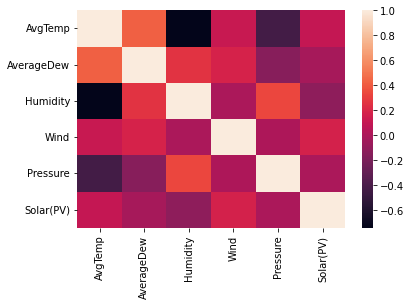

In [16]:
sns.heatmap(df.corr())

<AxesSubplot:>

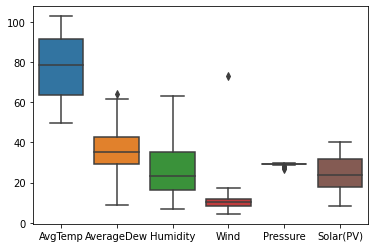

In [17]:
sns.boxplot(data=df)

In [18]:
df=df[df.Wind<20]

In [19]:
df=df[df.AverageDew>15]

In [20]:
df=df[df.Pressure>28.5]

In [21]:
df=df[df.Humidity<49]

In [22]:
df.to_csv('weaterdata.csv')

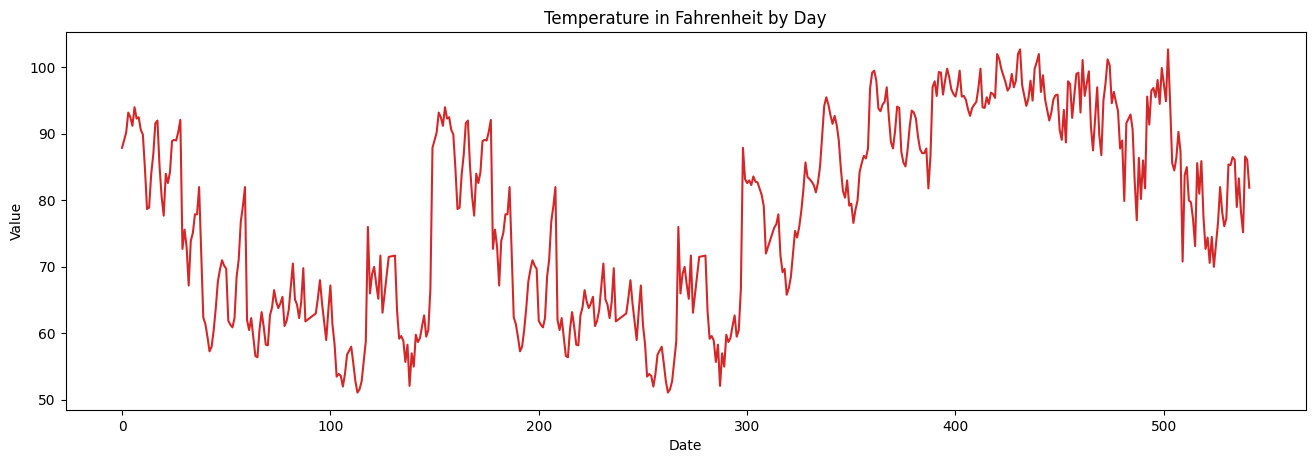

In [23]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100,color='tab:red'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.AvgTemp, title='Temperature in Fahrenheit by Day')   

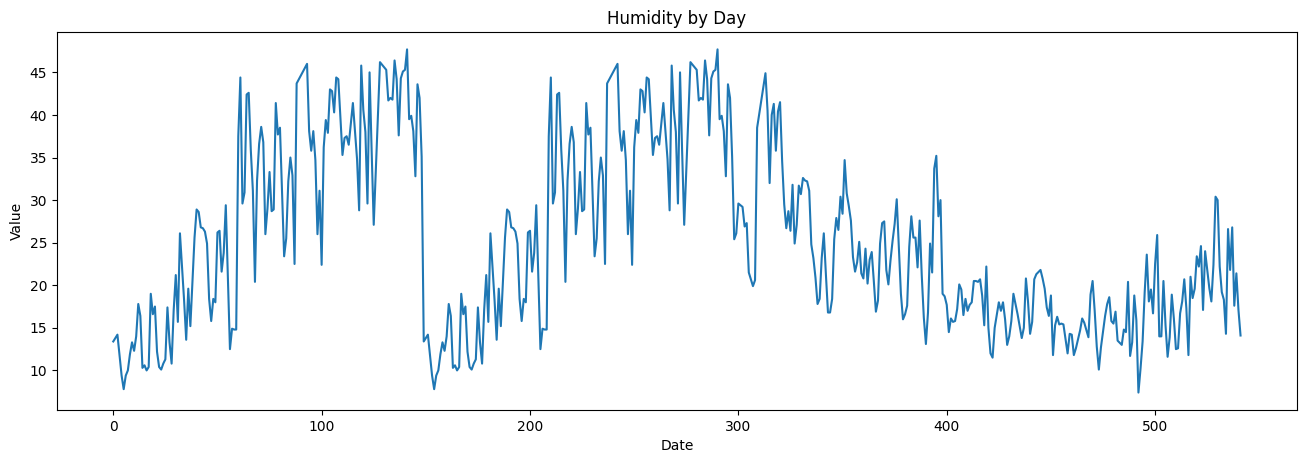

In [24]:
plot_df(df, x=df.index, y=df.Humidity, title='Humidity by Day',color='tab:blue')   

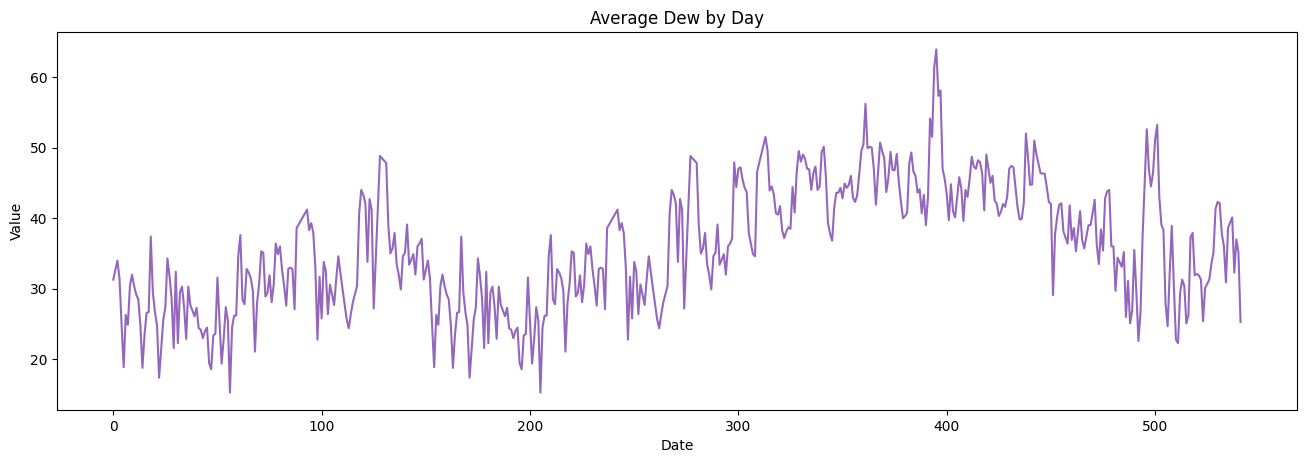

In [25]:
plot_df(df, x=df.index, y=df.AverageDew, title='Average Dew by Day',color='tab:purple')   

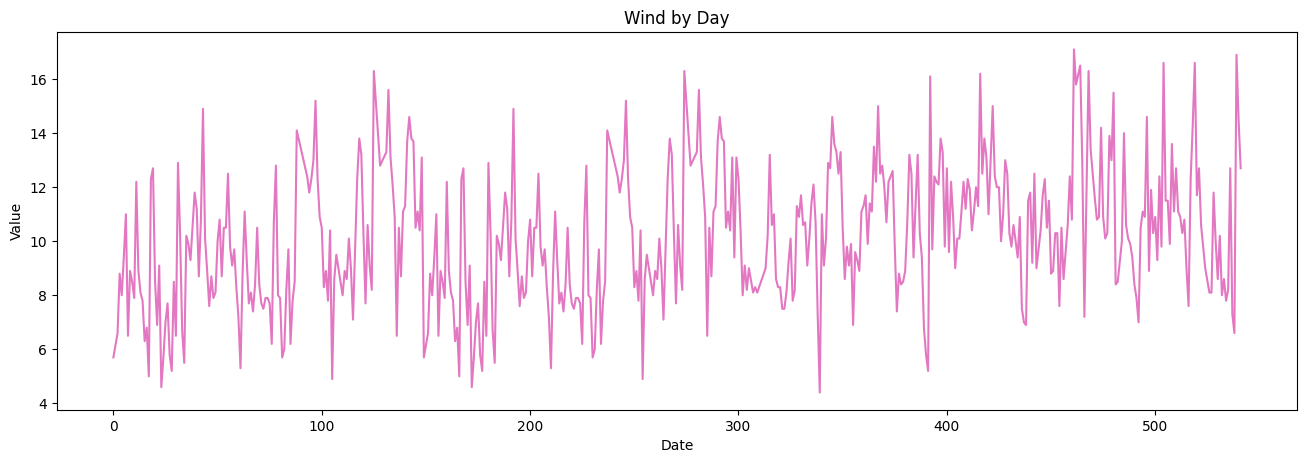

In [26]:
plot_df(df, x=df.index, y=df.Wind, title='Wind by Day',color='tab:pink')   

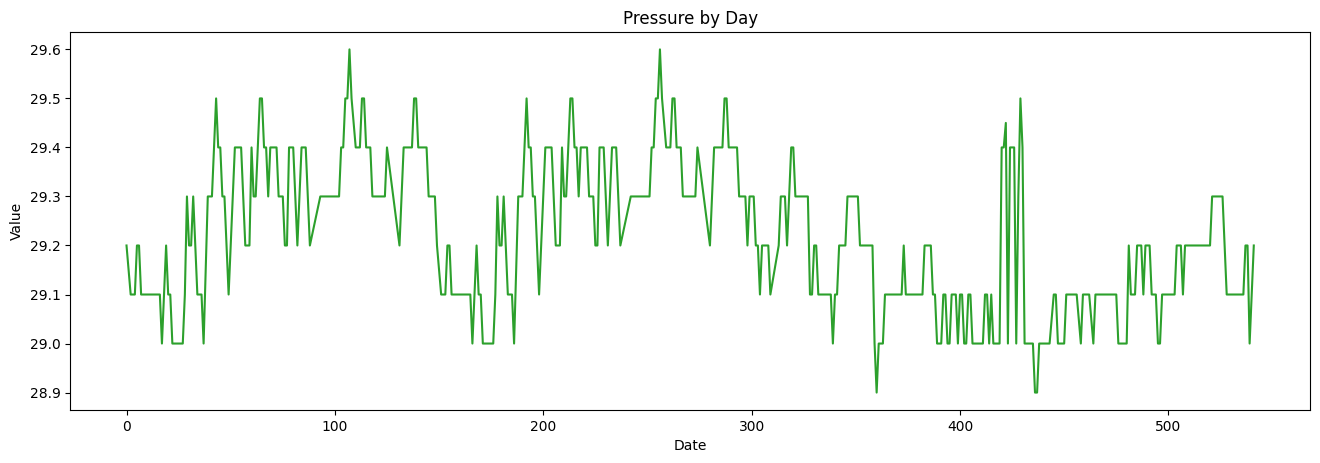

In [27]:
plot_df(df, x=df.index, y=df.Pressure, title='Pressure by Day',color='tab:green')   

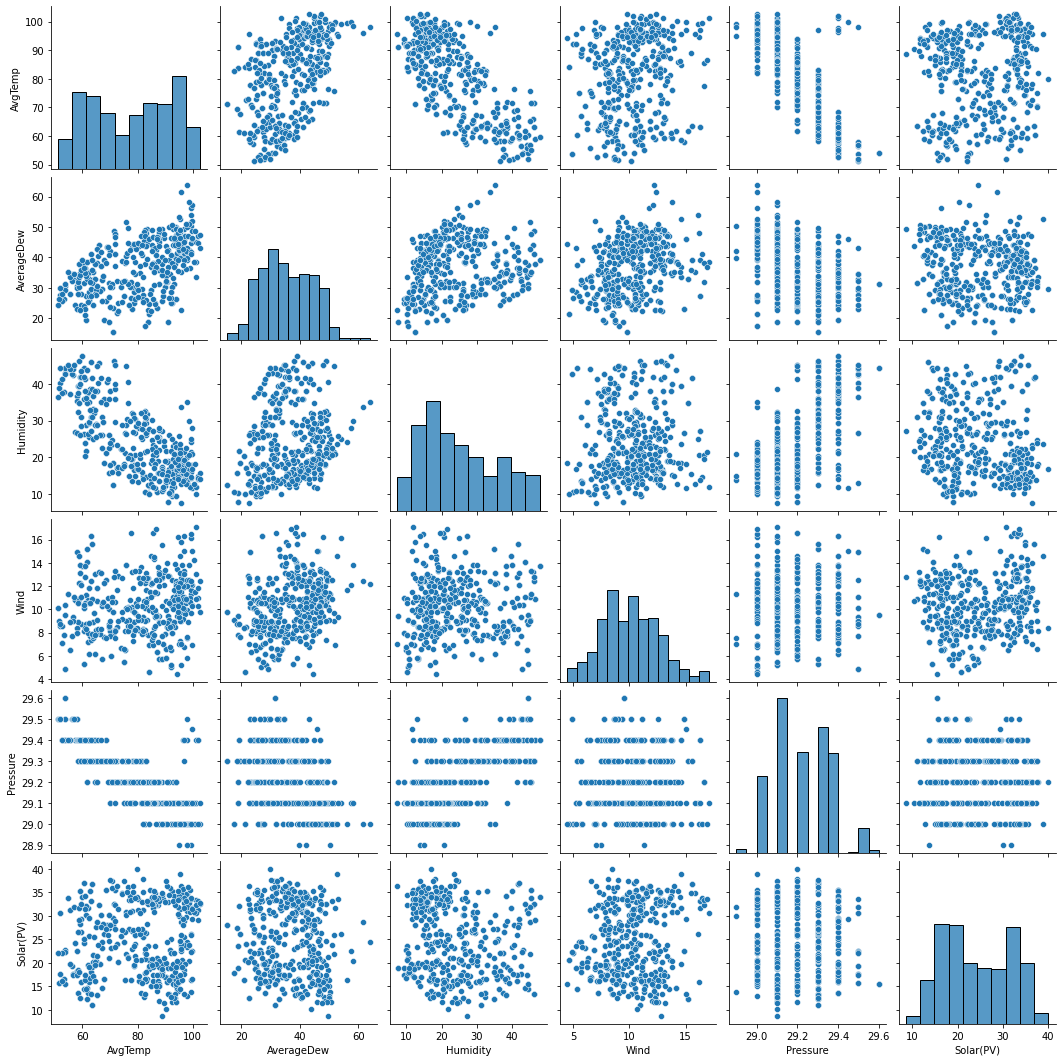

In [28]:
sns.pairplot(df)


In [29]:
y=df['Solar(PV)']

In [30]:
x=df.drop(['Date','Solar(PV)'],axis=1)

In [31]:
from sklearn.metrics import mean_squared_error


In [32]:
from sklearn.metrics import r2_score


In [33]:
x2=x.drop('Pressure',axis=1)

In [34]:
x2

,AvgTemp,AverageDew,Humidity,Wind
0,87.9,31.3,13.4,5.7
2,90.2,34.0,14.2,6.6
3,93.2,31.4,11.8,8.8
4,92.5,24.9,9.4,8.0
5,91.2,18.9,7.8,9.4
...,...,...,...,...
537,78.3,40.1,26.8,7.3
538,75.2,32.3,17.6,6.6
539,86.6,37.0,21.4,16.9
540,86.1,35.1,17.1,14.5


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [36]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [37]:
 regr.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [38]:
y_pred3=regr.predict(x)

In [39]:
r2_score(y_pred3,y)

-2.348399593037284

In [40]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x,y)

KNeighborsRegressor(n_neighbors=2)

In [41]:
y_pred4=neigh.predict(x)

In [42]:
r2_score(y_pred4,y)

0.8197535630184007

In [43]:
from scipy.stats import pearsonr
corr,_=pearsonr(df.AvgTemp,df['Solar(PV)'])

In [44]:
corr

0.06367223589964555

In [45]:
from scipy.stats import pearsonr
corr1,_=pearsonr(df.AverageDew,df['Solar(PV)'])

In [46]:
corr1

-0.04082966596851573

In [47]:
corr2,_=pearsonr(df.Humidity,df['Solar(PV)'])

In [48]:
corr2

-0.1014276209325069

In [49]:
corr3,_=pearsonr(df.Wind,df['Solar(PV)'])

In [50]:
corr3

0.1926118524990702

In [51]:
corr4,_=pearsonr(df.Pressure,df['Solar(PV)'])

In [52]:
corr4

0.0007471426359986302

In [53]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=2, random_state=0)
forest.fit(x, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [54]:
y_pred5=forest.predict(x)

In [55]:
r2_score(y_pred5,y)

-15.871916260180441

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x, y)
y_pred6=reg.predict(x)

In [57]:
r2_score(y_pred6,y)

0.2770364371054185

# Additions
- MLP model,Polynoimal Regression
- RNN, Quantile Regression, UBR, Lasso, Ridge

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)


In [60]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)


LinearRegression()

In [61]:
y_predicted = poly_reg_model.predict(poly_features)


In [62]:
r2_score(y,y_predicted)

0.19768667154116604

In [63]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet


In [64]:
lass=Lasso()
lass.fit(x,y)

Lasso()

In [65]:
y_pred_lass=lass.predict(x)

In [66]:
r2_score(y_pred_lass,y)

-27.80214160734901

In [67]:
ridge=Ridge()
ridge.fit(x,y)

Ridge()

In [69]:
y_pred_ridge=ridge.predict(x)

In [70]:
r2_score(y_pred_ridge,y)

-13.5518623060601

In [71]:
elastic=ElasticNet()
elastic.fit(x,y)

ElasticNet()

In [72]:
y_pred_elastic=elastic.predict(x)

In [73]:
r2_score(y_pred_elastic,y)

-22.92266848055022

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

PLSRegression(n_components=1)

In [78]:
y_pred_pcr=pcr.predict(x)
y_pred_pls=pls.predict(x)

In [79]:
r2_score(y_pred_pcr,y)

-345685.6408069431

In [80]:
r2_score(y_pred_pls,y)

-14.078698216921424

In [83]:
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(x)

C:\Users\omart\anaconda3\envs\JobEduConnection\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (507). n_quantiles is set to n_samples.
  warnings.warn(


In [84]:
clf=LinearRegression()
clf.fit(X_train_trans,y)

LinearRegression()

In [86]:
y_pred_trans=clf.predict(X_train_trans)

In [87]:
r2_score(y_pred_trans,y)

-11.749301470065818

In [88]:
from sklearn.linear_model import QuantileRegressor
quantiles = [0.05,0.25, 0.5,0.75, 0.95]

In [89]:
predictions = {}

In [91]:
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(x, y).predict(x)
    predictions[quantile] = y_pred

In [95]:
for key,value in predictions.items():
    print(r2_score(value,y))

-66.80591932653985
-34.72330075066165
-4.175283751056486
-9.101750931360444
-57.97790437685397


In [99]:
df['month'] = [d.strftime('%b') for d in df.Date]
df['year'] = [d.year for d in df.Date]
years = df['year'].unique()


Text(0.5, 1.0, 'Month-wise Box Plot\n(The Seasonality)')

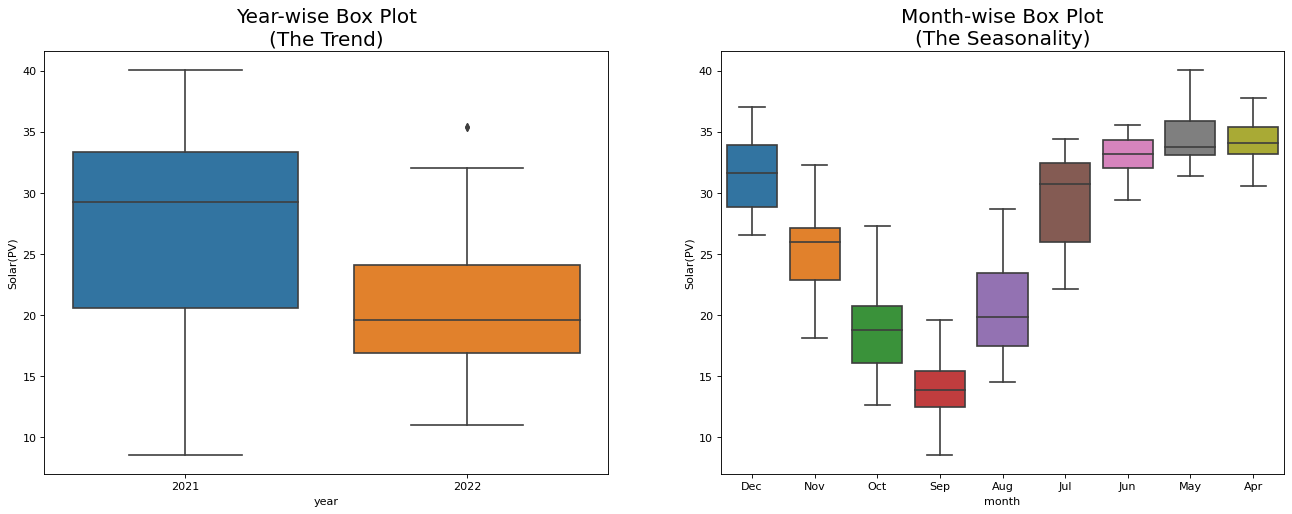

In [106]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Solar(PV)', data=df, ax=axes[0])
sns.boxplot(x='month', y='Solar(PV)', data=df.loc[~df.year.isin([2022]), :])
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

<AxesSubplot:xlabel='month', ylabel='Solar(PV)'>

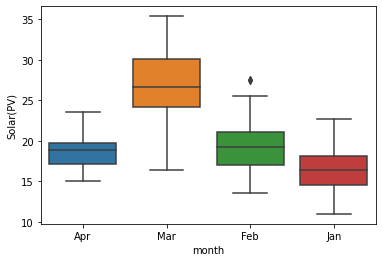

In [107]:
sns.boxplot(x='month', y='Solar(PV)', data=df.loc[~df.year.isin([2021]), :])

In [111]:
from statsmodels.tsa.stattools import adfuller, kpss


In [113]:
result = adfuller(df['Solar(PV)'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.4809529144418296
p-value: 0.008489951879054703


In [114]:
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df['Solar(PV)'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Critial Values:
   1%, -3.4435228622952065
Critial Values:
   5%, -2.867349510566146
Critial Values:
   10%, -2.569864247011056

KPSS Statistic: 0.941541
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\omart\anaconda3\envs\JobEduConnection\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

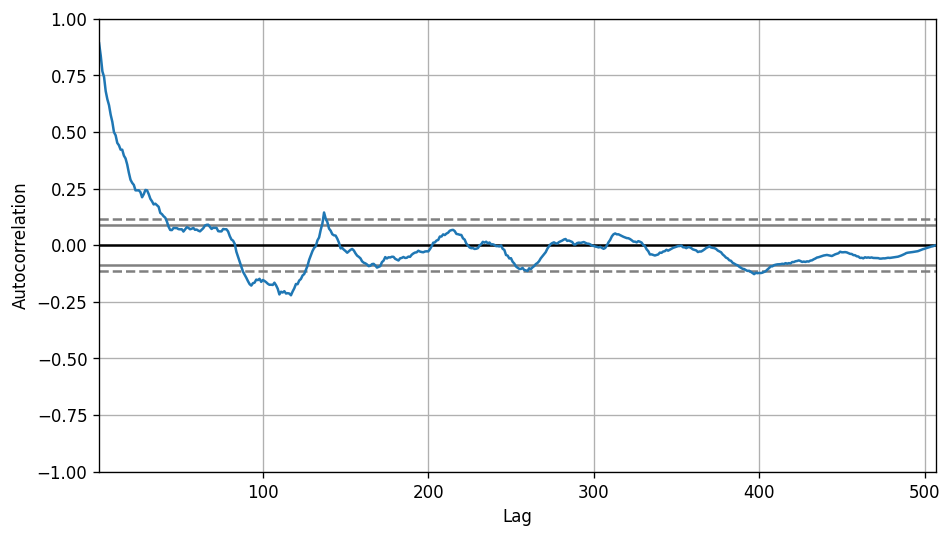

In [115]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Solar(PV)'].tolist())

C:\Users\omart\anaconda3\envs\JobEduConnection\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


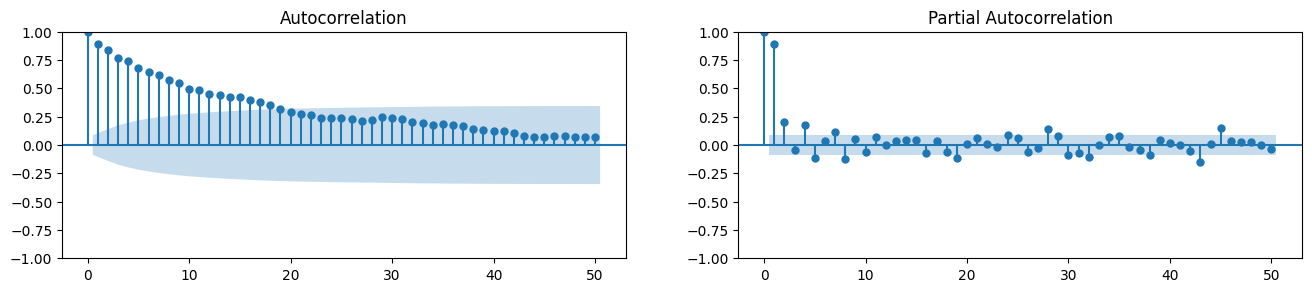

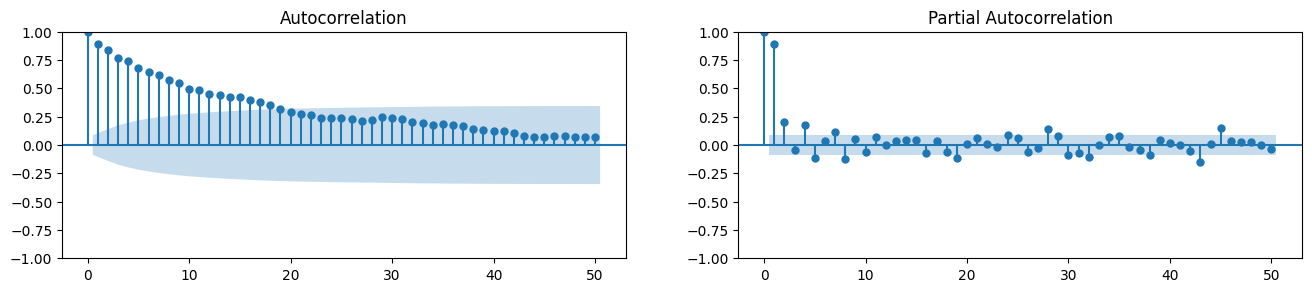

In [116]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Solar(PV)'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Solar(PV)'].tolist(), lags=50, ax=axes[1])

Text(0.5, 1.15, 'Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n')

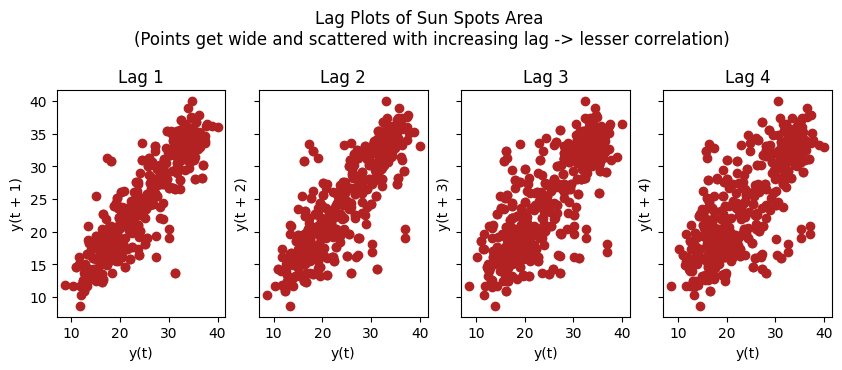

In [119]:
from pandas.plotting import lag_plot

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Solar(PV)'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    


In [120]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

# Regression checks
## Feature selection
### Try different models for time series
#### Check data
##### Get pollution data
###### MLP and RNN
###### Write report